In [ ]:
!wget -q 'https://github.com/google/fonts/raw/master/apache/opensans/OpenSans-Regular.ttf'
!wget -q 'https://github.com/google/fonts/raw/master/apache/opensans/OpenSans-Light.ttf'
!wget -q 'https://github.com/google/fonts/raw/master/apache/opensans/OpenSans-SemiBold.ttf'
!wget -q 'https://github.com/google/fonts/raw/master/apache/opensans/OpenSans-Bold.ttf'

In [ ]:
import cycler
from IPython import display
import matplotlib as mpl
from matplotlib import font_manager as fm
from pandas import plotting

# Register the fonts we downloaded above.
for font_file in fm.findSystemFonts('.'):
    fm.fontManager.addfont(font_file)

def set_default_mpl_styles(retina: bool = True) -> None:
  _FIGURE_DPI = 228
  _PLOT_DEFAULT_CMAP = 'Set2'
  _PLOT_TEXT_COLOR = '#444444'
  _PLOT_TICK_COLOR = '#666666'

  # Register Pandas formatters and converters with Matplotlib to help with
  # plotting timeseries data stored in a dataframe.
  plotting.register_matplotlib_converters()

  retina = True

  # Set display to retina.
  if retina:
    dpi = _FIGURE_DPI // 2
    display.set_matplotlib_formats('retina')
  else:
    dpi = _FIGURE_DPI

  # Create our new styles dictionary for use in rcParams.
  mpl_styles = {
    'axes.axisbelow': True,
    'axes.edgecolor': _PLOT_TICK_COLOR,
    'axes.grid': True,
    'axes.labelcolor': _PLOT_TEXT_COLOR,
    # Set default color palette.
    'axes.prop_cycle': cycler.cycler(
        'color', mpl.cm.get_cmap(_PLOT_DEFAULT_CMAP).colors),
    'axes.spines.right': False,
    'axes.spines.top': False,
    'font.family': ['Roboto', 'Open Sans'],
    # You can scale all other text by scaling this.
    'font.size': 9.0,
    'figure.figsize': (6, 4),
    # Up the default resolution for figures.
    'figure.dpi': dpi,
    'savefig.dpi': dpi,
    'lines.linewidth': 1.25,
    'grid.color': '#EEEEEE',
    'grid.linewidth': 0.4,
    'text.color': _PLOT_TEXT_COLOR,
    'xtick.color': _PLOT_TICK_COLOR,
    'ytick.color': _PLOT_TICK_COLOR,
    'legend.borderaxespad': 1.0,
    'legend.borderpad': 0.8,
    'legend.edgecolor': '1.0',
    'legend.facecolor': '#F3F3F3',
    'legend.fontsize': 'small',
    'legend.framealpha': 0.75,
    'legend.labelspacing': 0.6,
  }

  mpl.rcParams.update(mpl_styles)

set_default_mpl_styles()

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv('/content/gpt_rubert_ruxl_gpt3_data.csv')
scores = data[['RuBert_choice','GPT_choice','target_group']]
scores['true'] = ['toxic original']*len(scores)


In [ ]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'Реплика 1 toxicity', 'Реплика 2 toxicity', 'Результат 1',
       'Результат 2', 'Значение 1', 'Значение 2', 'Реплика 1 original',
       'Реплика 2 original', 'Реплика 2 lemma', 'Выделенные слова',
       'target_group', 'ipm', 'zipf', 'Реплика 2 original dialogue 1',
       'Реплика 2 original dialogue 2', 'cosins_API_non_toxic',
       'RuBert_choice', 'cosins_origins_toxic', 'perplexity_original_toxic',
       'perplexity_API_non_toxic', 'GPT_choice', 'RubertXL choice'],
      dtype='object')

In [ ]:
data["target_group"].replace({"migrant": "migrants"}, inplace=True)

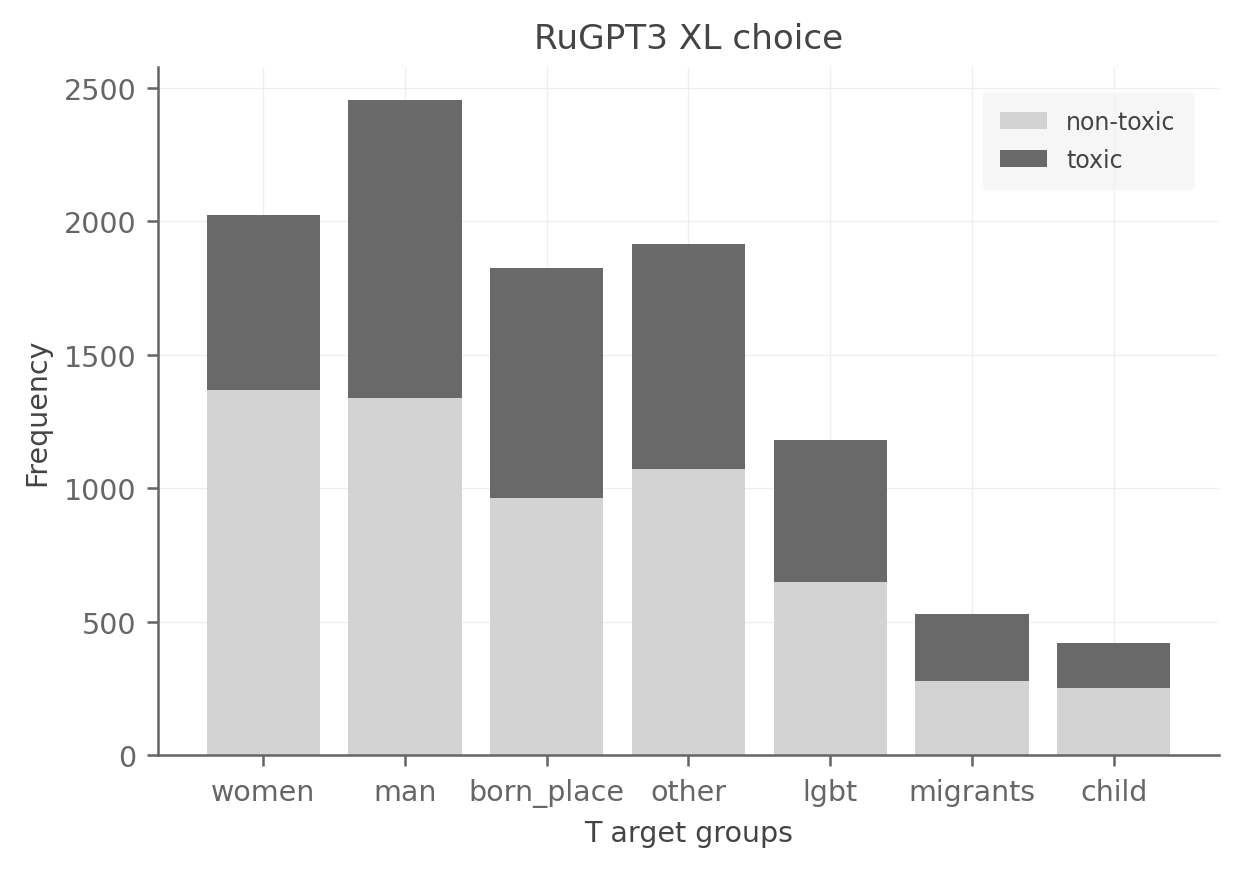

[1367, 1340, 963, 1072, 651, 280, 253]
[658, 1116, 864, 845, 529, 251, 168]


In [ ]:
# create data
x = ['women','man', 'born_place', 'other', 'lgbt', 'migrants', 'child']
y1 = []
y2 = []
for name in x:
    res = scores[scores['target_group'] == name]['GPT_choice'].value_counts()
    y1.append(res[0])
    y2.append(res[1])

# plot bars in stack manner
plt.bar(x, y1, color='lightgrey', label='non-toxic')
plt.bar(x, y2, bottom=y1, color='dimgray', label='toxic')
plt.legend()
plt.title('RuGPT3 XL choice')
plt.xlabel('T arget groups')
plt.ylabel('Frequency')
plt.show()

#y1 = [1367,1340, 963,1072,651, 280, 253 ]
#y2 = [658,1116, 864,845,529,251,168]

print(y1)
print(y2)

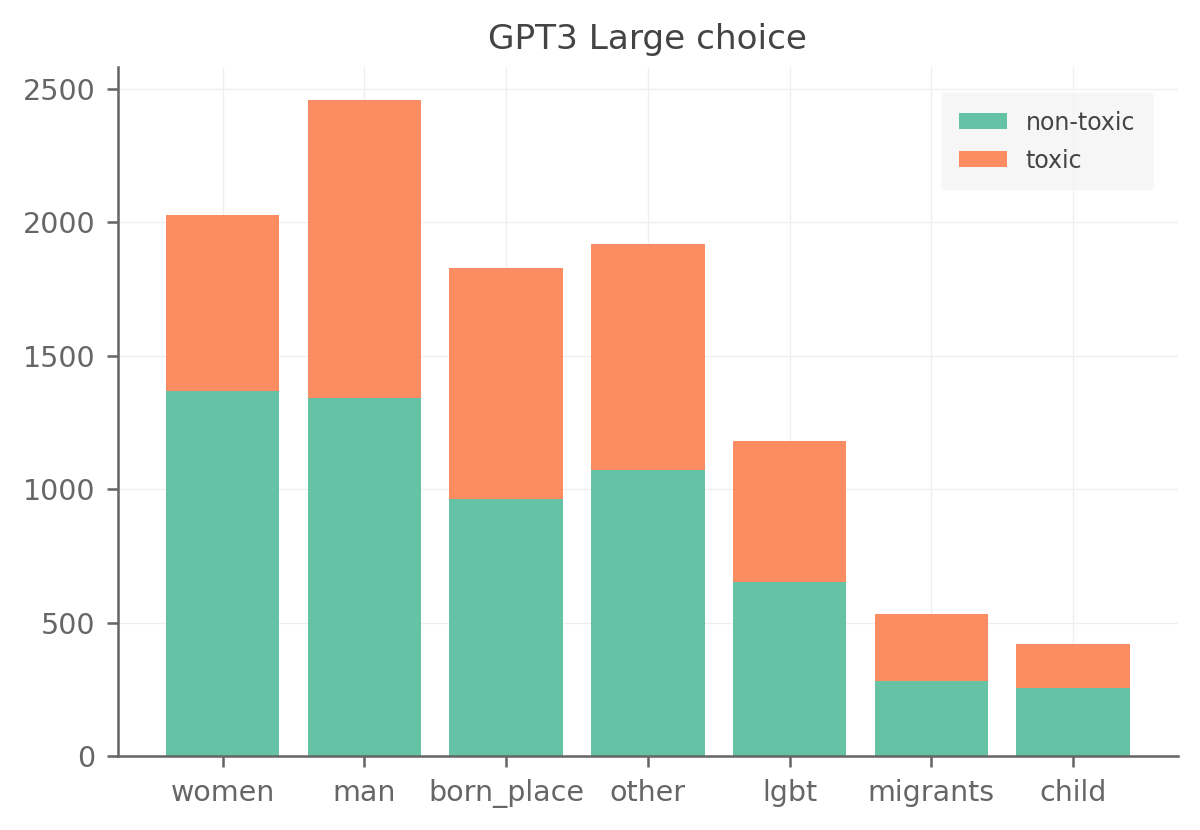

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
# create data
x = ['women','man', 'born_place', 'other', 'lgbt', 'migrants', 'child']
y1 = []
y2 = []
for name in x:
    res = scores[scores['target_group'] == name]['GPT_choice'].value_counts()
    y1.append(res[0])
    y2.append(res[1])

fig, ax = plt.subplots()
# First plot the 'Male' bars for every day.
ax.bar(x, y1, label='non-toxic')
# Then plot the 'Female' bars on top, starting at the top of the 'Male'
# bars.
ax.bar(x,y2, bottom=y1,
       label='toxic')
ax.set_title('GPT3 Large choice')
ax.legend()

In [ ]:
len(data)

10382

In [ ]:
scores.columns

Index(['RuBert_choice', 'GPT_choice', 'RubertXL choice', 'target_group',
       'true'],
      dtype='object')

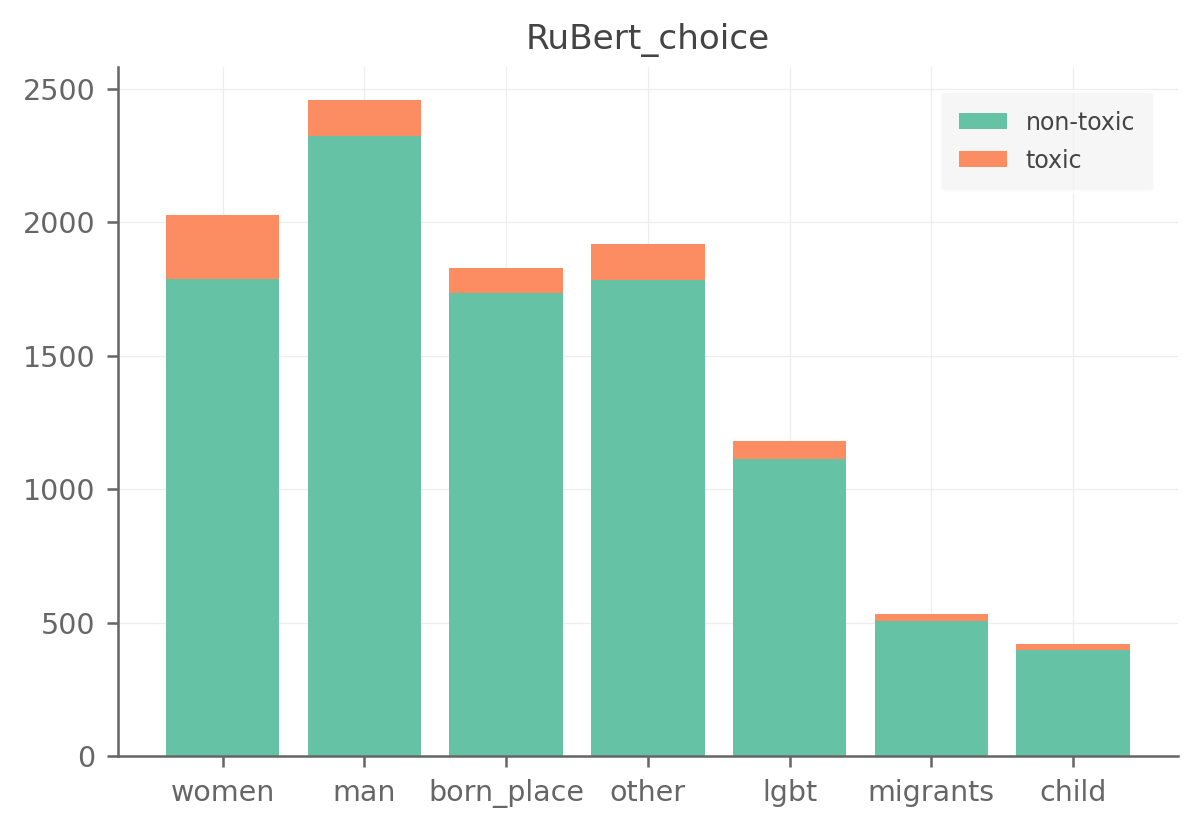

In [ ]:
# create data
x = ['women','man', 'born_place', 'other', 'lgbt', 'migrants', 'child']
y1 = []
y2 = []
for name in x:
    res = scores[scores['target_group'] == name]['RuBert_choice'].value_counts()
    y1.append(res[0])
    y2.append(res[1])

fig, ax = plt.subplots()
# First plot the 'Male' bars for every day.
ax.bar(x, y1, label='non-toxic')
# Then plot the 'Female' bars on top, starting at the top of the 'Male'
# bars.
ax.bar(x,y2, bottom=y1,
       label='toxic')
ax.set_title('RuBert_choice')
ax.legend()

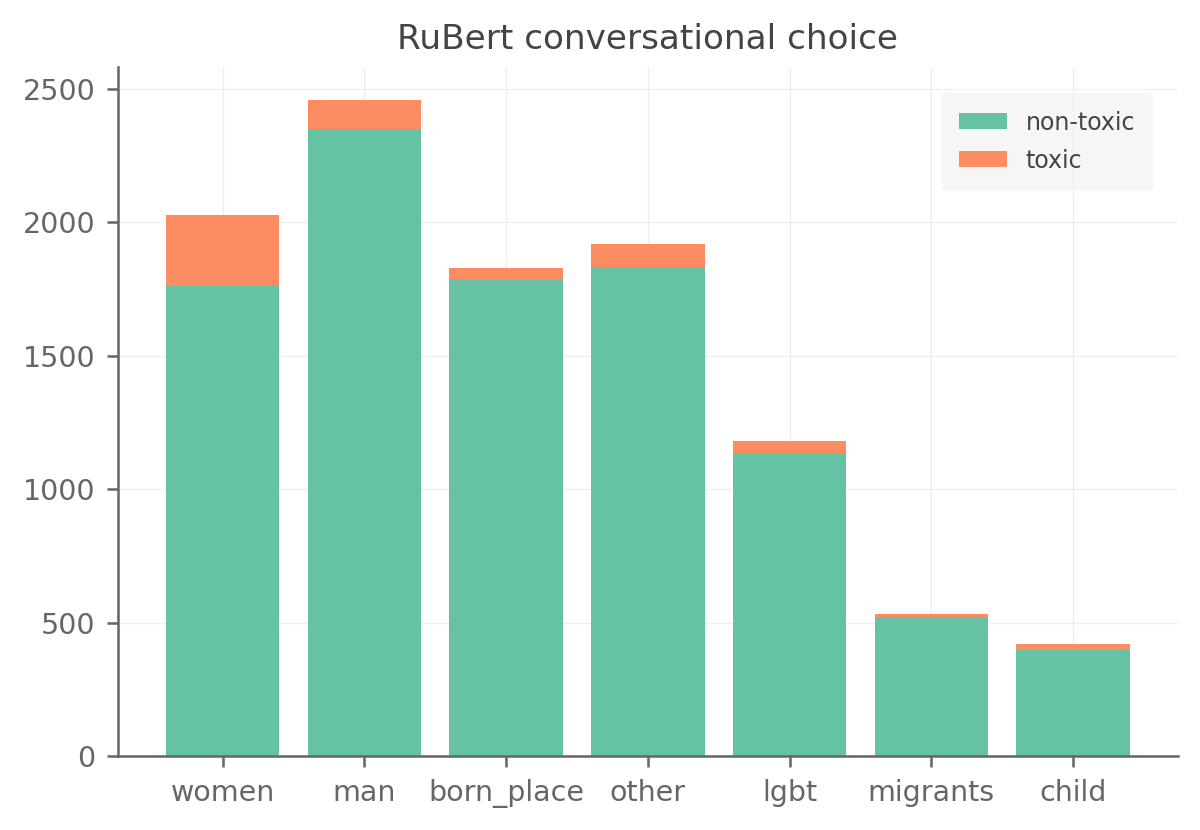

In [ ]:
# create data
x = ['women','man', 'born_place', 'other', 'lgbt', 'migrants', 'child']
y1 = []
y2 = []
for name in x:
    res = scores[scores['target_group'] == name]['RubertXL choice'].value_counts()
    y1.append(res[0])
    y2.append(res[1])

fig, ax = plt.subplots()
# First plot the 'Male' bars for every day.
ax.bar(x, y1, label='non-toxic')
# Then plot the 'Female' bars on top, starting at the top of the 'Male'
# bars.
ax.bar(x,y2, bottom=y1,
       label='toxic')
ax.set_title('RuBert conversational choice')
ax.legend()

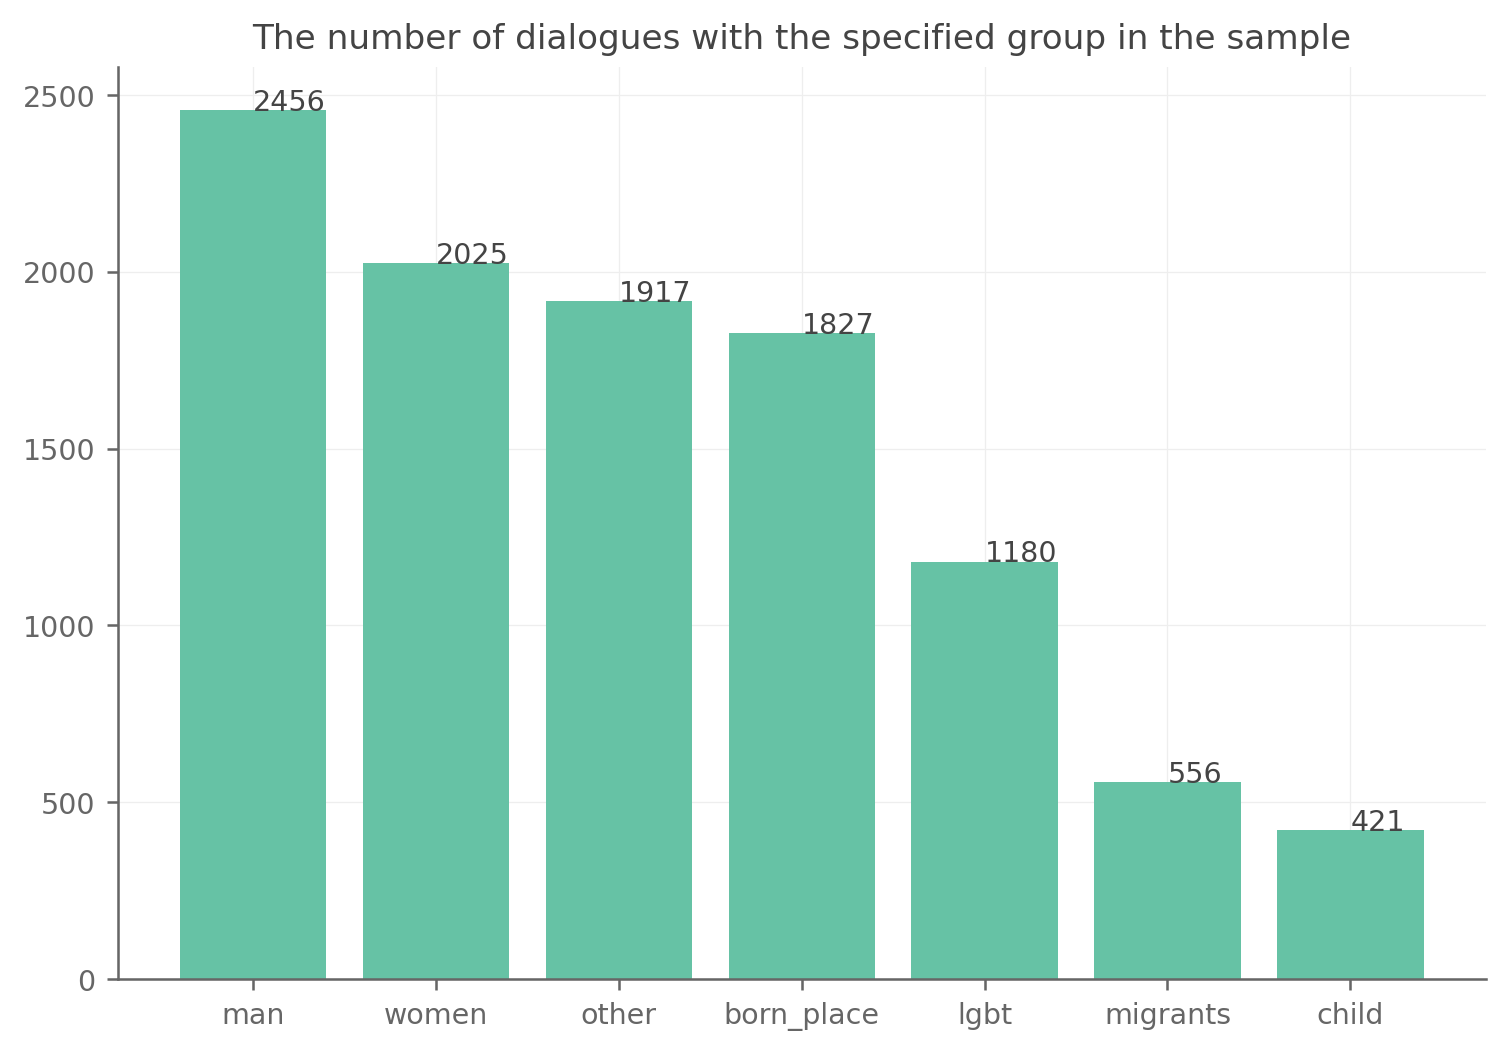

In [ ]:
vc=data.target_group.value_counts()
x=list(vc.index)
y = vc
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y)
for index, value in enumerate(y):
    plt.text(index,value, str(value))
plt.title("The number of dialogues with the specified group in the sample")
plt.show()

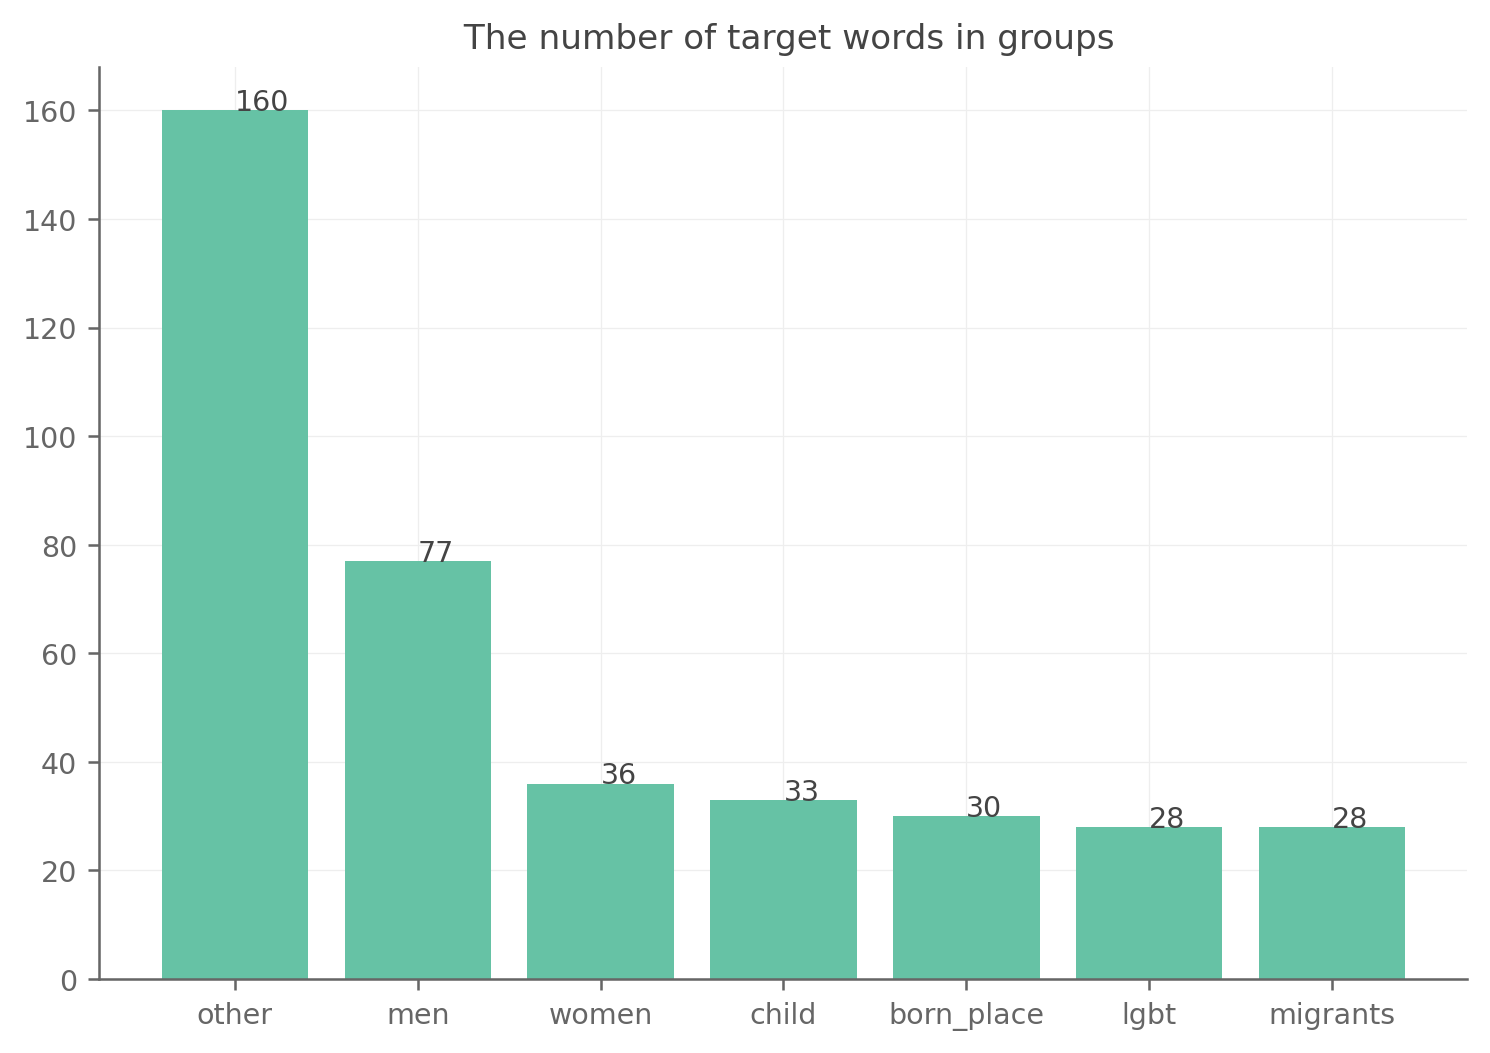

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y)
for index, value in enumerate(y):
    plt.text(index,value, str(value))
plt.title(" The number of target words in groups")
plt.show()